# `01` Import Necessary Libraries

## `i` Default Libraries

In [297]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [364]:
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [299]:
PROJECT_ROOT_DIR = "."

----------------------------

# `02` Load Data

In [300]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [301]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$


In [302]:
housing.dropna(inplace=True)
x = housing.drop("median_house_value" , axis=1)
y = housing["median_house_value"]


In [365]:
x_train , x_test  , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=1234 )
x_train1 , x_test1  , y_train1 , y_test1 = train_test_split(x , y , test_size=0.2 , random_state=1234 )


In [304]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

16346
16346
4087
4087


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.


In [305]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## `total_bedrooms` coloumn has 207 null values

In [306]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [307]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## No Duplicates

In [308]:
housing.duplicated().sum()

np.int64(0)

In [309]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

## `ii` Visual Analysis

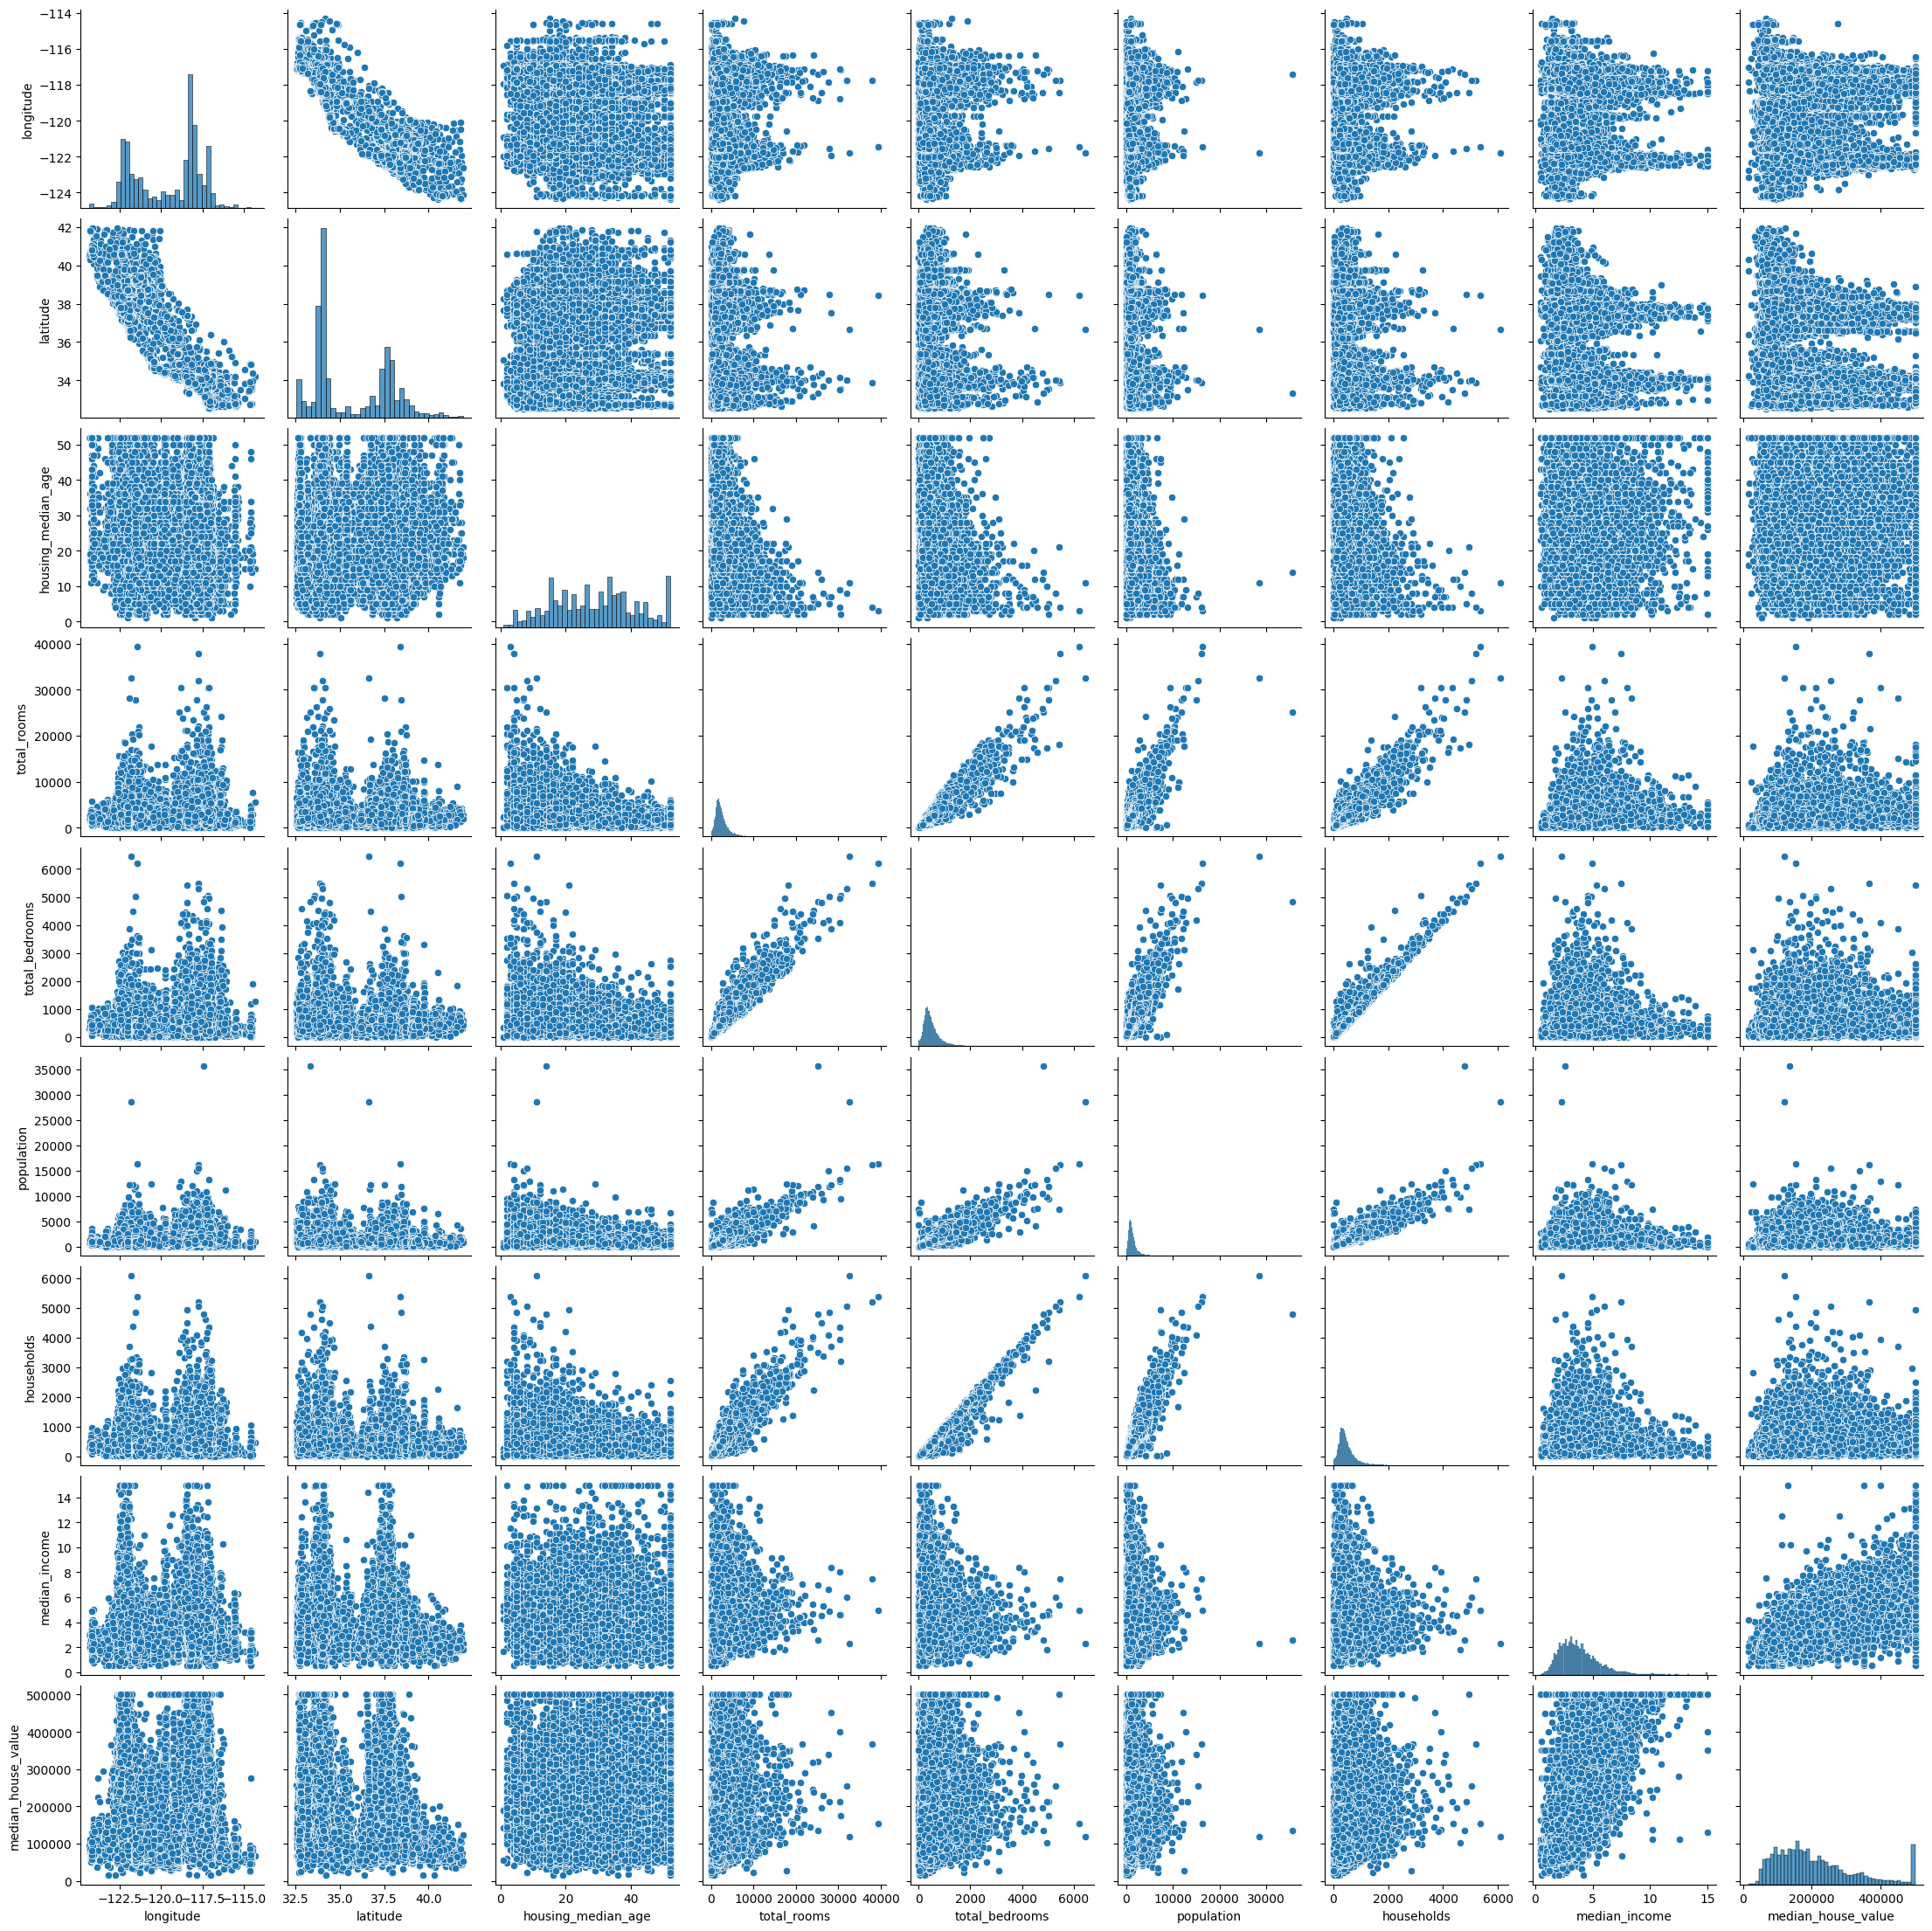

In [310]:
sns.pairplot(housing)

## `total_rooms` , `total_bedrooms` , `population` & `housholds` are positively correleated

<Axes: xlabel='longitude', ylabel='latitude'>

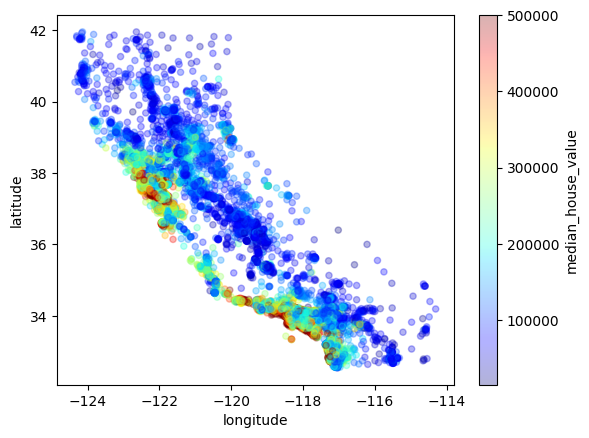

In [311]:
housing.plot(kind='scatter' , x="longitude" , y="latitude" ,alpha=0.3 ,c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True , sharex=False)


In [312]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Download", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

Download california.png


('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x22d9790ab90>)

Text(0.5, 0, 'Longitude')

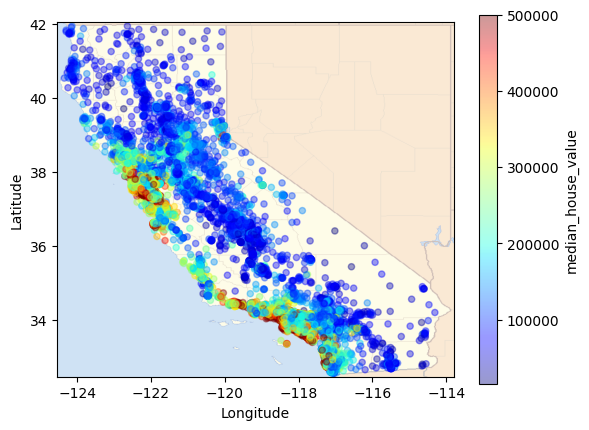

In [313]:
california_img=mpimg.imread(os.path.join(images_path, filename))
housing.plot(kind='scatter' , x="longitude" , y="latitude" ,alpha=0.4 ,c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude")
plt.xlabel("Longitude")

## We can understand from the plot that ,
When we go far from the occean the house prices decrease and ,                                                                                  
When we go near the occean the house prices increase .

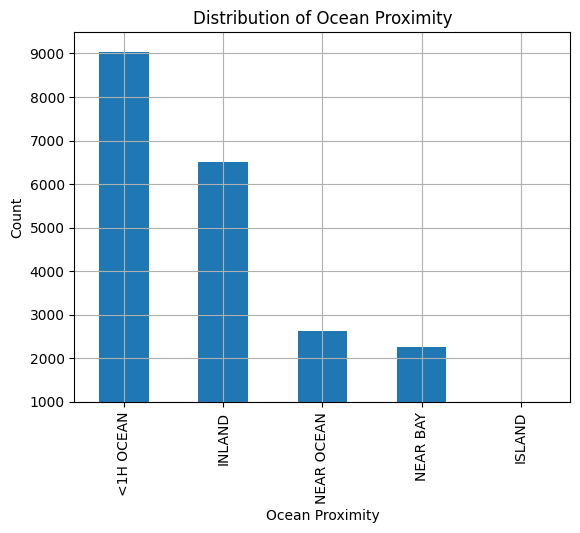

In [387]:
housing['ocean_proximity'].value_counts().plot(kind='bar')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.ylim(1000)
plt.title('Distribution of Ocean Proximity')
plt.grid()
plt.show()

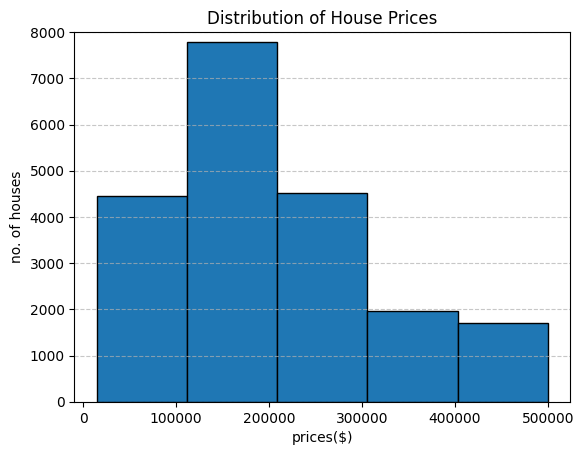

In [432]:
plt.hist(housing['median_house_value'] , bins=5 , rwidth=1, edgecolor = 'black')
plt.xlabel('prices($)')
plt.ylabel('no. of houses')
plt.title('Distribution of House Prices')
plt.ylim(0,8000)
#plt.xlim(100000,500000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

----------------

# `04` Data Preparation

## Dropping the null values 

In [314]:
housing.dropna(inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [315]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2625,-117.27,33.23,5.0,20908.0,3933.0,9690.0,3510.0,4.1405,<1H OCEAN
1548,-118.38,33.81,20.0,1975.0,306.0,703.0,292.0,8.5491,NEAR OCEAN
3856,-119.05,35.32,11.0,7035.0,1455.0,3525.0,1387.0,3.4827,INLAND
17958,-118.17,34.10,25.0,4444.0,647.0,1922.0,652.0,8.0580,<1H OCEAN
2303,-121.24,38.64,13.0,4491.0,689.0,1657.0,667.0,5.2590,INLAND
...,...,...,...,...,...,...,...,...,...
8304,-117.41,33.93,35.0,793.0,150.0,669.0,128.0,4.0156,INLAND
9544,-117.31,33.24,6.0,1580.0,288.0,792.0,265.0,4.0469,<1H OCEAN
8556,-116.95,33.79,8.0,10997.0,2205.0,5060.0,1949.0,2.1979,INLAND
17228,-117.20,34.04,23.0,1762.0,267.0,1132.0,279.0,5.9915,INLAND


In [316]:
encoder = LabelEncoder()
x_train["ocean_proximity_encoded"] = encoder.fit_transform(x_train["ocean_proximity"])
x_train = x_train.drop("ocean_proximity",axis=1)



## Converting the `ocean_proximity` into `numerical values`

In [317]:
x_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
2625,-117.27,33.23,5.0,20908.0,3933.0,9690.0,3510.0,4.1405,0
1548,-118.38,33.81,20.0,1975.0,306.0,703.0,292.0,8.5491,4
3856,-119.05,35.32,11.0,7035.0,1455.0,3525.0,1387.0,3.4827,1
17958,-118.17,34.10,25.0,4444.0,647.0,1922.0,652.0,8.0580,0
2303,-121.24,38.64,13.0,4491.0,689.0,1657.0,667.0,5.2590,1
11115,-117.06,33.15,24.0,2155.0,379.0,1158.0,360.0,4.7941,0
5806,-118.17,34.68,13.0,5341.0,773.0,2288.0,724.0,6.6772,1
15657,-117.25,33.25,6.0,6160.0,993.0,2997.0,1029.0,4.6187,0
17458,-121.18,38.67,42.0,2101.0,480.0,945.0,426.0,2.3333,1
788,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845,0


In [318]:
scaler = StandardScaler()

In [319]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns) 
x_train_scaled


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
0,1.145367,-1.122681,-1.879038,8.271462,8.062835,7.238077,7.886819,0.141234,-0.820384
1,0.592062,-0.851358,-0.689895,-0.295670,-0.543582,-0.626750,-0.536489,2.459450,1.995807
2,0.258085,-0.144985,-1.403381,1.993967,2.182851,1.842878,2.329739,-0.204663,-0.116336
3,0.696741,-0.715697,-0.293515,0.821546,0.265568,0.440038,0.405832,2.201210,-0.820384
4,-0.833570,1.408101,-1.244829,0.842813,0.365229,0.208128,0.445096,0.729385,-0.116336
...,...,...,...,...,...,...,...,...,...
16341,1.075581,-0.795223,0.499247,-0.830522,-0.913750,-0.656504,-0.965769,0.075557,-0.116336
16342,1.125428,-1.118003,-1.799762,-0.474407,-0.586294,-0.548863,-0.607164,0.092015,-0.820384
16343,1.304878,-0.860714,-1.641209,3.786761,3.962507,3.186208,3.800808,-0.880262,-0.116336
16344,1.180260,-0.743765,-0.452067,-0.392052,-0.636124,-0.251317,-0.570518,1.114563,-0.116336


## `#` Prepare Test Set

In [320]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
6940,-118.07,33.83,17.0,4822.0,1168.0,3868.0,1117.0,2.5978,<1H OCEAN
14755,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,INLAND
5438,-121.79,38.01,17.0,4032.0,814.0,1749.0,618.0,3.1728,INLAND
13873,-117.38,34.06,17.0,3139.0,569.0,1612.0,516.0,3.3571,INLAND
10185,-117.84,33.74,22.0,6072.0,1802.0,4715.0,1666.0,3.1353,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15540,-118.36,33.96,37.0,2146.0,573.0,2009.0,592.0,3.6583,<1H OCEAN
10604,-120.95,36.47,52.0,1691.0,301.0,618.0,239.0,3.2292,<1H OCEAN
2056,-122.36,37.96,30.0,950.0,317.0,1073.0,280.0,1.8664,NEAR BAY
19838,-117.03,32.96,16.0,3424.0,698.0,1940.0,645.0,4.1210,<1H OCEAN


In [321]:
x_test["ocean_proximity_encoded"] = encoder.transform(x_test["ocean_proximity"])
x_test = x_test.drop("ocean_proximity",axis=1)

In [322]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
6940,-118.07,33.83,17.0,4822.0,1168.0,3868.0,1117.0,2.5978,0
14755,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,1
5438,-121.79,38.01,17.0,4032.0,814.0,1749.0,618.0,3.1728,1
13873,-117.38,34.06,17.0,3139.0,569.0,1612.0,516.0,3.3571,1
10185,-117.84,33.74,22.0,6072.0,1802.0,4715.0,1666.0,3.1353,0
...,...,...,...,...,...,...,...,...,...
15540,-118.36,33.96,37.0,2146.0,573.0,2009.0,592.0,3.6583,0
10604,-120.95,36.47,52.0,1691.0,301.0,618.0,239.0,3.2292,0
2056,-122.36,37.96,30.0,950.0,317.0,1073.0,280.0,1.8664,3
19838,-117.03,32.96,16.0,3424.0,698.0,1940.0,645.0,4.1210,0


In [323]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
0,0.746589,-0.842003,-0.927724,0.992590,1.501836,2.143049,1.622998,-0.669979,-0.820384
1,-0.539471,1.239694,-0.610619,0.211127,0.346246,-0.068414,0.128371,-0.911654,-0.116336
2,-1.107730,1.113389,-0.927724,0.635117,0.661839,0.288640,0.316835,-0.367621,-0.116336
3,1.090535,-0.734409,-0.927724,0.231037,0.080484,0.168747,0.049844,-0.270709,-0.116336
4,0.861237,-0.884104,-0.531343,1.558212,3.006239,2.884287,3.060038,-0.387340,-0.820384
...,...,...,...,...,...,...,...,...,...
4082,0.602031,-0.781189,0.657799,-0.218293,0.089976,0.516175,0.248779,-0.112326,-0.820384
4083,-0.689013,0.392982,1.846941,-0.424179,-0.555446,-0.701136,-0.675220,-0.337964,-0.820384
4084,-1.391860,1.089999,0.102866,-0.759480,-0.517480,-0.302950,-0.567900,-1.054578,1.291760
4085,1.265000,-1.248986,-1.007000,0.359999,0.386585,0.455791,0.387509,0.130980,-0.820384


----------------------------

# `05` Normal Equation



## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [324]:
lr = LinearRegression()
lr.fit(x_train_scaled , y_train)

LinearRegression()

In [325]:
y_pred = lr.predict(x_test_scaled)

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [326]:
print("Mean squared error : " , mean_squared_error(y_test,y_pred))
print("Mean absolute error : " , mean_absolute_error(y_test,y_pred))
print("R2 score : " , r2_score(y_test,y_pred)*100 , "%")

Mean squared error :  4681391122.594771
Mean absolute error :  50583.98805348654
R2 score :  64.1672912312321 %


----------------------

# `06` Linear Regression with Gradient Descent


## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [327]:
sgd = SGDRegressor(penalty=None , learning_rate='constant' , eta0=0.0001)
sgd.fit(x_train_scaled,y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', penalty=None)

In [328]:
sgd_pred = sgd.predict(x_test_scaled)

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [329]:
print("Mean squared error : " , mean_squared_error(y_test,sgd_pred))
print("Mean absolute error : " , mean_absolute_error(y_test,sgd_pred))
print("R2 score : " , r2_score(y_test,sgd_pred)*100 , "%")

Mean squared error :  4684252532.654222
Mean absolute error :  50557.78822951449
R2 score :  64.1453891789055 %


## `iii` Tune `learning_rate`

In [336]:
param_grid={
    'eta0':[0.1,0.01,0.001,0.0001]
    }

In [337]:
grid_search = GridSearchCV(SGDRegressor(learning_rate='constant' , penalty=None) , param_grid)

In [338]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(estimator=SGDRegressor(learning_rate='constant', penalty=None),
             param_grid={'eta0': [0.1, 0.01, 0.001, 0.0001]})

In [339]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007487,0.001381,0.001418,0.001017,0.1000,{'eta0': 0.1},-657.710370,-107.453479,-53844.684535,-5.653029e+07,-0.098049,-1.131698e+07,2.260667e+07,4
1,0.006331,0.000753,0.000649,0.000420,0.0100,{'eta0': 0.01},0.585037,0.513662,0.610735,5.950641e-01,0.638023,5.885043e-01,4.147951e-02,3
2,0.008314,0.001560,0.001212,0.000819,0.0010,{'eta0': 0.001},0.615519,0.642417,0.637441,6.161469e-01,0.642145,6.307339e-01,1.229603e-02,2
3,0.020215,0.002858,0.000493,0.000747,0.0001,{'eta0': 0.0001},0.614598,0.641918,0.637942,6.229486e-01,0.646645,6.328104e-01,1.207999e-02,1


In [340]:
grid_search.best_params_

{'eta0': 0.0001}

## Optimal learnig rate is : `0.0001`

In [341]:
grid_search.best_score_

np.float64(0.6328104220158886)

In [342]:
best_sgd = grid_search.best_estimator_
best_sgd

SGDRegressor(eta0=0.0001, learning_rate='constant', penalty=None)

In [343]:
best_sgd.score(x_test_scaled , y_test)

0.6413904136290028

## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization

In [344]:
param_grid={
    'eta0':[0.1,0.01,0.001,0.0001],
    'penalty':['l1' , 'l2']
    }

In [345]:
grid_search = GridSearchCV(SGDRegressor(learning_rate='constant') , param_grid)

In [346]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(estimator=SGDRegressor(learning_rate='constant'),
             param_grid={'eta0': [0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']})

In [347]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011521,0.008761,0.000998,0.000892,0.1000,l1,"{'eta0': 0.1, 'penalty': 'l1'}",-102801.423509,-7.885723e+01,-2879.922046,-5.745399e+09,0.360725,-1.149101e+09,2.298149e+09,8
1,0.005552,0.000642,0.000874,0.000598,0.1000,l2,"{'eta0': 0.1, 'penalty': 'l2'}",-0.267585,-2.594450e+07,-60.832104,-1.847947e-02,-22158.519749,-5.193345e+06,1.037558e+07,7
2,0.008952,0.006676,0.000739,0.000661,0.0100,l1,"{'eta0': 0.01, 'penalty': 'l1'}",0.597264,5.721196e-01,0.619797,5.812827e-01,0.643992,6.028911e-01,2.615543e-02,5
3,0.008203,0.003322,0.000484,0.000607,0.0100,l2,"{'eta0': 0.01, 'penalty': 'l2'}",0.616352,6.081534e-01,0.610613,6.047342e-01,0.560688,6.001080e-01,2.007120e-02,6
4,0.015996,0.004958,0.000521,0.000778,0.0010,l1,"{'eta0': 0.001, 'penalty': 'l1'}",0.613675,6.406620e-01,0.638782,6.204514e-01,0.643210,6.313560e-01,1.194816e-02,3
5,0.008129,0.001536,0.001087,0.000815,0.0010,l2,"{'eta0': 0.001, 'penalty': 'l2'}",0.615284,6.429926e-01,0.634464,6.208615e-01,0.641118,6.309441e-01,1.102700e-02,4
6,0.039202,0.005655,0.002442,0.002534,0.0001,l1,"{'eta0': 0.0001, 'penalty': 'l1'}",0.614248,6.416812e-01,0.637865,6.231660e-01,0.646514,6.326948e-01,1.207928e-02,1
7,0.022554,0.004492,0.001971,0.000891,0.0001,l2,"{'eta0': 0.0001, 'penalty': 'l2'}",0.614429,6.421641e-01,0.637728,6.232046e-01,0.645923,6.326896e-01,1.194720e-02,2


In [348]:
grid_search.best_params_

{'eta0': 0.0001, 'penalty': 'l1'}

## `L1` is `better` than `L2` in regularization 

In [349]:
best_sgd1 = grid_search.best_estimator_
best_sgd1

SGDRegressor(eta0=0.0001, learning_rate='constant', penalty='l1')

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [351]:
best_sgd1.score(x_test_scaled , y_test)

0.6415904324628352

-----------------------------

# `Pipeline` for a Better Flow


In [366]:
x_train1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2625,-117.27,33.23,5.0,20908.0,3933.0,9690.0,3510.0,4.1405,<1H OCEAN
1548,-118.38,33.81,20.0,1975.0,306.0,703.0,292.0,8.5491,NEAR OCEAN
3856,-119.05,35.32,11.0,7035.0,1455.0,3525.0,1387.0,3.4827,INLAND
17958,-118.17,34.10,25.0,4444.0,647.0,1922.0,652.0,8.0580,<1H OCEAN
2303,-121.24,38.64,13.0,4491.0,689.0,1657.0,667.0,5.2590,INLAND
...,...,...,...,...,...,...,...,...,...
8304,-117.41,33.93,35.0,793.0,150.0,669.0,128.0,4.0156,INLAND
9544,-117.31,33.24,6.0,1580.0,288.0,792.0,265.0,4.0469,<1H OCEAN
8556,-116.95,33.79,8.0,10997.0,2205.0,5060.0,1949.0,2.1979,INLAND
17228,-117.20,34.04,23.0,1762.0,267.0,1132.0,279.0,5.9915,INLAND


In [373]:

categorical_columns = ["ocean_proximity"]
numerical_columns = x_train1.drop(columns=categorical_columns).columns.to_list()

preprocessing = ColumnTransformer(
    transformers=[
        ('encoder' , OneHotEncoder() , categorical_columns),
        ('scaler' , StandardScaler() , numerical_columns)
        ]) 

pipeline = Pipeline(
    steps=[
    ('preprocessing', preprocessing),
    ('regressor', SGDRegressor(penalty='l1', learning_rate='constant', max_iter=10000, eta0=0.0001))
])

In [374]:
pipeline.fit(x_train1,y_train1)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['ocean_proximity']),
                                                 ('scaler', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income'])])),
                ('regressor',
                 SGDRegressor(eta0=0.0001, learning_rate='constant',
                              max_iter=10000, penalty='l1'))])

In [375]:
pipeline.predict(x_test1)

array([153188.70468066,  82994.46282228, 148299.44969749, ...,
       144035.39392726, 214842.12874458,  69398.10012497])

In [376]:
pipeline.score(x_test1,y_test1)

0.6493653743611776

----------------------------------------------
